<a href="https://colab.research.google.com/github/momotonton/DS_Project/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get update -qq
!pip install pandas_alive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [26]:
import pandas as pd
import numpy as np
import math as e
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from datetime import datetime
vgames2 = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv')
df = vgames2.iloc[:,1:] # index remove

In [4]:
def yearchange(x):
  if -1 < x < 22 : 
    return x+2000
  elif 22< x <100 :
    return x+1900    
  else :
    return x

def kchange (x) :
  if x > 50:
    return x/10000
  else :
    return x  

def tofloat (x):
  return float(x)

def toInt (x):
  return int(x)

def outliers_iqr(data):
  q1, q3 = np.percentile(data, [25,75])
  iqr = q3 -q1
  lower_bound = q1 - (iqr * 1.5)
  upper_bound = q3 + (iqr * 1.5)
  
  return np.where((data > upper_bound)|(data <lower_bound)) 
  
def dr_outlier(df): 
  quartile_1 = df.quantile(0.25) 
  quartile_3 = df.quantile(0.75) 
  IQR = quartile_3 - quartile_1 
  condition = (df < (quartile_1 - 1.5 * IQR)) | (df > (quartile_3 + 1.5 * IQR)) 
  condition = condition.any(axis=1) 
  search_df = df[condition] 
  return search_df, df.drop(search_df.index, axis=0)



In [ ]:
df_DS = df['Platform'] == 'DS'
df_DS = df[df_DS]
df_DS['Year'] = df_DS['Year'].fillna(df_DS['Year'].mean())
df_DS['Year'] = df_DS['Year'].astype(int)
DS_freq = df_DS['Genre'].value_counts(dropna=True).idxmax()
df_DS['Genre'].fillna(DS_freq, inplace = True)

df_Wii = df['Platform'] == 'Wii'
df_Wii = df[df_Wii]
df_Wii['Year'] = df_Wii['Year'].fillna(df_Wii['Year'].mean())
df_Wii['Year'] = df_Wii['Year'].astype(int)
Wii_freq = df_Wii['Genre'].value_counts(dropna=True).idxmax()
df_Wii['Genre'].fillna(Wii_freq, inplace = True)

df_PSP = df['Platform'] == 'PSP'
df_PSP = df[df_PSP]
df_PSP['Year'] = df_PSP['Year'].fillna(df_PSP['Year'].mean())
df_PSP['Year'] = df_PSP['Year'].astype(int)
PSP_freq = df_PSP['Genre'].value_counts(dropna=True).idxmax()
df_PSP['Genre'].fillna(PSP_freq, inplace = True)

df_PS2 = df['Platform'] == 'PS2'
df_PS2 = df[df_PS2]
df_PS2['Year'] = df_PS2['Year'].fillna(df_PS2['Year'].mean())
df_PS2['Year'] = df_PS2['Year'].astype(int)
PS2_freq = df_PS2['Genre'].value_counts(dropna=True).idxmax()
df_PS2['Genre'].fillna(PS2_freq, inplace = True)

df_PS3 = df['Platform'] == 'PS3'
df_PS3 = df[df_PS3]
df_PS3['Year'] = df_PS3['Year'].fillna(df_PS3['Year'].mean())
df_PS3['Year'] = df_PS3['Year'].astype(int)
PS3_freq = df_PS3['Genre'].value_counts(dropna=True).idxmax()
df_PS3['Genre'].fillna(PS3_freq, inplace = True)



df_PC = df['Platform'] == 'PC'
df_PC = df[df_PC]
df_PC['Year'] = df_PC['Year'].fillna(df_PC['Year'].mean())
df_PC['Year'] = df_PC['Year'].astype(int)
PC_freq = df_PC['Genre'].value_counts(dropna=True).idxmax()
df_PC['Genre'].fillna(PC_freq, inplace = True)


df_PS = df['Platform'] == 'PS'
df_PS = df[df_PS]
df_PS['Year'] = df_PS['Year'].fillna(df_PS['Year'].mean())
df_PS['Year'] = df_PS['Year'].astype(int)
PS_freq = df_PS['Genre'].value_counts(dropna=True).idxmax()
df_PS['Genre'].fillna(PS_freq, inplace = True)


df_X360 = df['Platform'] == 'X360'
df_X360 = df[df_X360]
df_X360['Year'] = df_X360['Year'].fillna(df_X360['Year'].mean())
df_X360['Year'] = df_X360['Year'].astype(int)
X360_freq = df_X360['Genre'].value_counts(dropna=True).idxmax()
df_X360['Genre'].fillna(X360_freq, inplace = True)

df_GBA = df['Platform'] == 'GBA'
df_GBA = df[df_GBA]
df_GBA['Year'] = df_GBA['Year'].fillna(df_GBA['Year'].mean())
df_GBA['Year'] = df_GBA['Year'].astype(int)
GBA_freq = df_GBA['Genre'].value_counts(dropna=True).idxmax()
df_GBA['Genre'].fillna(GBA_freq, inplace = True)


df_PS4 = df['Platform'] == 'PS4'
df_PS4 = df[df_PS4]
df_PS4['Year'] = df_PS4['Year'].fillna(df_PS4['Year'].mean())
df_PS4['Year'] = df_PS4['Year'].astype(int)
PS4_freq = df_PS4['Genre'].value_counts(dropna=True).idxmax()
df_PS4['Genre'].fillna(PS4_freq, inplace = True)


df_XB = df['Platform'] == 'XB'
df_XB = df[df_XB]
df_XB['Year'] = df_XB['Year'].fillna(df_XB['Year'].mean())
df_XB['Year'] = df_XB['Year'].astype(int)
XB_freq = df_XB['Genre'].value_counts(dropna=True).idxmax()
df_XB['Genre'].fillna(XB_freq, inplace = True)


df_GC = df['Platform'] == 'GC'
df_GC = df[df_GC]
df_GC['Year'] = df_GC['Year'].fillna(df_GC['Year'].mean())
df_GC['Year'] = df_GC['Year'].astype(int)
GC_freq = df_GC['Genre'].value_counts(dropna=True).idxmax()
df_GC['Genre'].fillna(GC_freq, inplace = True)


df_3DS = df['Platform'] == '3DS'
df_3DS = df[df_3DS]
df_3DS['Year'] = df_3DS['Year'].fillna(df_3DS['Year'].mean())
df_3DS['Year'] = df_3DS['Year'].astype(int)
N3DS_freq = df_3DS['Genre'].value_counts(dropna=True).idxmax()
df_3DS['Genre'].fillna(N3DS_freq, inplace = True)


df_2600 = df['Platform'] == '2600'
df_2600 = df[df_2600]
df_2600['Year'] = df_2600['Year'].fillna(df_2600['Year'].mean())
df_2600['Year'] = df_2600['Year'].astype(int)
atari_freq = df_2600['Genre'].value_counts(dropna=True).idxmax()
df_2600['Genre'].fillna(atari_freq, inplace = True)


df_SCD = df['Platform'] == 'SCD'
df_SCD = df[df_SCD]
df_SCD['Year'] = df_SCD['Year'].fillna(df_SCD['Year'].mean())
df_SCD['Year'] = df_SCD['Year'].astype(int)
SCD_freq = df_SCD['Genre'].value_counts(dropna=True).idxmax()
df_SCD['Genre'].fillna(SCD_freq, inplace = True)


df_SAT = df['Platform'] == 'SAT'
df_SAT = df[df_SAT]
df_SAT['Year'] = df_SAT['Year'].fillna(df_SAT['Year'].mean())
df_SAT['Year'] = df_SAT['Year'].astype(int)
SAT_freq = df_SAT['Genre'].value_counts(dropna=True).idxmax()
df_SAT['Genre'].fillna(SAT_freq, inplace = True)


df_GB = df['Platform'] == 'GB'
df_GB = df[df_GB]
df_GB['Year'] = df_GB['Year'].fillna(df_GB['Year'].mean())
df_GB['Year'] = df_GB['Year'].astype(int)
GB_freq = df_GB['Genre'].value_counts(dropna=True).idxmax()
df_GB['Genre'].fillna(GB_freq, inplace = True)


df_NES = df['Platform'] == 'NES'
df_NES = df[df_NES]
df_NES['Year'] = df_NES['Year'].fillna(df_NES['Year'].mean())
df_NES['Year'] = df_NES['Year'].astype(int)
NES_freq = df_NES['Genre'].value_counts(dropna=True).idxmax()
df_NES['Genre'].fillna(NES_freq, inplace = True)


df_DC = df['Platform'] == 'DC'
df_DC = df[df_DC]
df_DC['Year'] = df_DC['Year'].fillna(df_DC['Year'].mean())
df_DC['Year'] = df_DC['Year'].astype(int)
DC_freq = df_DC['Genre'].value_counts(dropna=True).idxmax()
df_DC['Genre'].fillna(DC_freq, inplace = True)


df_N64 = df['Platform'] == 'N64'
df_N64 = df[df_N64]
df_N64['Year'] = df_N64['Year'].fillna(df_N64['Year'].mean())
df_N64['Year'] = df_N64['Year'].astype(int)
N64_freq = df_N64['Genre'].value_counts(dropna=True).idxmax()
df_N64['Genre'].fillna(N64_freq, inplace = True)


df_XOne = df['Platform'] == 'XOne'
df_XOne = df[df_XOne]
df_XOne['Year'] = df_XOne['Year'].fillna(df_XOne['Year'].mean())
df_XOne['Year'] = df_XOne['Year'].astype(int)
XOne_freq = df_XOne['Genre'].value_counts(dropna=True).idxmax()
df_XOne['Genre'].fillna(XOne_freq, inplace = True)


df_SNES = df['Platform'] == 'SNES'
df_SNES = df[df_SNES]
df_SNES['Year'] = df_SNES['Year'].fillna(df_SNES['Year'].mean())
df_SNES['Year'] = df_SNES['Year'].astype(int)
SNES_freq = df_SNES['Genre'].value_counts(dropna=True).idxmax()
df_SNES['Genre'].fillna(SNES_freq, inplace = True)


df_WiiU = df['Platform'] == 'WiiU'
df_WiiU = df[df_WiiU]
df_WiiU['Year'] = df_WiiU['Year'].fillna(df_WiiU['Year'].mean())
df_WiiU['Year'] = df_WiiU['Year'].astype(int)
WiiU_freq = df_WiiU['Genre'].value_counts(dropna=True).idxmax()
df_WiiU['Genre'].fillna(WiiU_freq, inplace = True)


df_PSV = df['Platform'] == 'PSV'
df_PSV = df[df_PSV]
df_PSV['Year'] = df_PSV['Year'].fillna(df_PSV['Year'].mean())
df_PSV['Year'] = df_PSV['Year'].astype(int)
PSV_freq = df_PSV['Genre'].value_counts(dropna=True).idxmax()
df_PSV['Genre'].fillna(PSV_freq, inplace = True)


df_GEN = df['Platform'] == 'GEN'
df_GEN = df[df_GEN]
df_GEN['Year'] = df_GEN['Year'].fillna(df_GEN['Year'].mean())
df_GEN['Year'] = df_GEN['Year'].astype(int)
GEN_freq = df_GEN['Genre'].value_counts(dropna=True).idxmax()
df_GEN['Genre'].fillna(GEN_freq, inplace = True)


df_TG16 = df['Platform'] == 'TG16'
df_TG16 = df[df_TG16]
df_TG16['Year'] = df_TG16['Year'].fillna(df_TG16['Year'].mean())
df_TG16['Year'] = df_TG16['Year'].astype(int)
TG16_freq = df_TG16['Genre'].value_counts(dropna=True).idxmax()
df_TG16['Genre'].fillna(TG16_freq, inplace = True)


df_WS = df['Platform'] == 'WS'
df_WS = df[df_WS]
df_WS['Year'] = df_WS['Year'].fillna(df_WS['Year'].mean())
df_WS['Year'] = df_WS['Year'].astype(int)
WS_freq = df_WS['Genre'].value_counts(dropna=True).idxmax()
df_WS['Genre'].fillna(WS_freq, inplace = True)


df_3DO = df['Platform'] == '3DO'
df_3DO = df[df_3DO]
df_3DO['Year'] = df_3DO['Year'].fillna(df_3DO['Year'].mean())
df_3DO['Year'] = df_3DO['Year'].astype(int)
NWC_freq = df_3DO['Genre'].value_counts(dropna=True).idxmax()
df_3DO['Genre'].fillna(NWC_freq, inplace = True)


df_NG = df['Platform'] == 'NG'
df_NG = df[df_NG]
df_NG['Year'] = df_NG['Year'].fillna(df_NG['Year'].mean())
df_NG['Year'] = df_NG['Year'].astype(int)
NG_freq = df_NG['Genre'].value_counts(dropna=True).idxmax()
df_NG['Genre'].fillna(NG_freq, inplace = True)


df_GG = df['Platform'] == 'GG'
df_GG = df[df_GG]
df_GG['Year'] = df_GG['Year'].fillna(df_GG['Year'].mean())
df_GG['Year'] = df_GG['Year'].astype(int)
GG_freq = df_GG['Genre'].value_counts(dropna=True).idxmax()
df_GG['Genre'].fillna(GG_freq, inplace = True)


df_PCFX = df['Platform'] == 'PCFX'
df_PCFX = df[df_PCFX]
df_PCFX['Year'] = df_PCFX['Year'].fillna(df_PCFX['Year'].mean())
df_PCFX['Year'] = df_PCFX['Year'].astype(int)
PCFX_freq = df_PCFX['Genre'].value_counts(dropna=True).idxmax()
df_PCFX['Genre'].fillna(PCFX_freq, inplace = True)


In [8]:
df_a = pd.concat([df_DS, df_Wii, df_PSP, df_PS3, df_PC, df_PS, df_GBA, df_PS4, df_PS2, df_XB,
       df_X360, df_GC, df_3DS, df_2600, df_SAT, df_GB, df_NES, df_DC, df_N64,
       df_XOne, df_SNES, df_WiiU, df_PSV, df_GEN, df_SCD, df_WS, df_NG, df_TG16,
       df_3DO, df_GG, df_PCFX])

In [9]:
df_a['Year'] = df_a['Year'].apply(yearchange)

In [10]:
df_a['NA_Sales'] = df_a['NA_Sales'].map(lambda x: x.replace('M',''))
df_a['JP_Sales'] = df_a['JP_Sales'].map(lambda x: x.replace('M',''))
df_a['EU_Sales'] = df_a['EU_Sales'].map(lambda x: x.replace('M',''))
df_a['Other_Sales'] = df_a['Other_Sales'].map(lambda x: x.replace('M',''))

In [11]:
df_a['NA_Sales'] = df_a['NA_Sales'].map(lambda x: x.replace('K','0'))
df_a['JP_Sales'] = df_a['JP_Sales'].map(lambda x: x.replace('K','0'))
df_a['EU_Sales'] = df_a['EU_Sales'].map(lambda x: x.replace('K','0'))
df_a['Other_Sales'] = df_a['Other_Sales'].map(lambda x: x.replace('K','0'))

In [12]:
df_a['NA_Sales'] = df_a['NA_Sales'].apply(tofloat)
df_a['JP_Sales'] = df_a['JP_Sales'].apply(tofloat)
df_a['EU_Sales'] = df_a['EU_Sales'].apply(tofloat)
df_a['Other_Sales'] = df_a['Other_Sales'].apply(tofloat)

In [13]:
df_a['NA_Sales'] = df_a['NA_Sales'].apply(kchange)
df_a['JP_Sales'] = df_a['JP_Sales'].apply(kchange)
df_a['EU_Sales'] = df_a['EU_Sales'].apply(kchange)
df_a['Other_Sales'] = df_a['Other_Sales'].apply(kchange)

In [14]:
df_a['All_Sales'] = df_a['NA_Sales'] + df_a['JP_Sales'] + df_a['EU_Sales'] + df_a['Other_Sales']

In [15]:
df_a['Year'] = pd.to_datetime(df_a['Year'], format='%Y')

In [16]:
sales_sum = df_a[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()

sales_name = ['NA','EU','JP','Other']

genre_sum =[df_a['NA_Sales'].groupby(df_a['Genre']).sum(),
            df_a['EU_Sales'].groupby(df_a['Genre']).sum(),
            df_a['JP_Sales'].groupby(df_a['Genre']).sum(),
            df_a['Other_Sales'].groupby(df_a['Genre']).sum()]


df_NA_genre = df_a['NA_Sales'].groupby(df_a['Genre']).sum()
df_NA_f = df_NA_genre.sort_values()
df_EU_genre = df_a['EU_Sales'].groupby(df_a['Genre']).sum()
df_EU_f = df_EU_genre.sort_values()
df_JP_genre = df_a['JP_Sales'].groupby(df_a['Genre']).sum()
df_JP_f = df_JP_genre.sort_values()
df_Other_genre = df_a['Other_Sales'].groupby(df_a['Genre']).sum()
df_Other_f = df_Other_genre.sort_values()

sumsum = list(df_NA_f.values)+list(df_EU_f.values)+list(df_JP_f.values)+list(df_Other_f.values)
sumindex = list(df_NA_f.index)+list(df_EU_f.index)+list(df_JP_f.index)+list(df_Other_f.index)


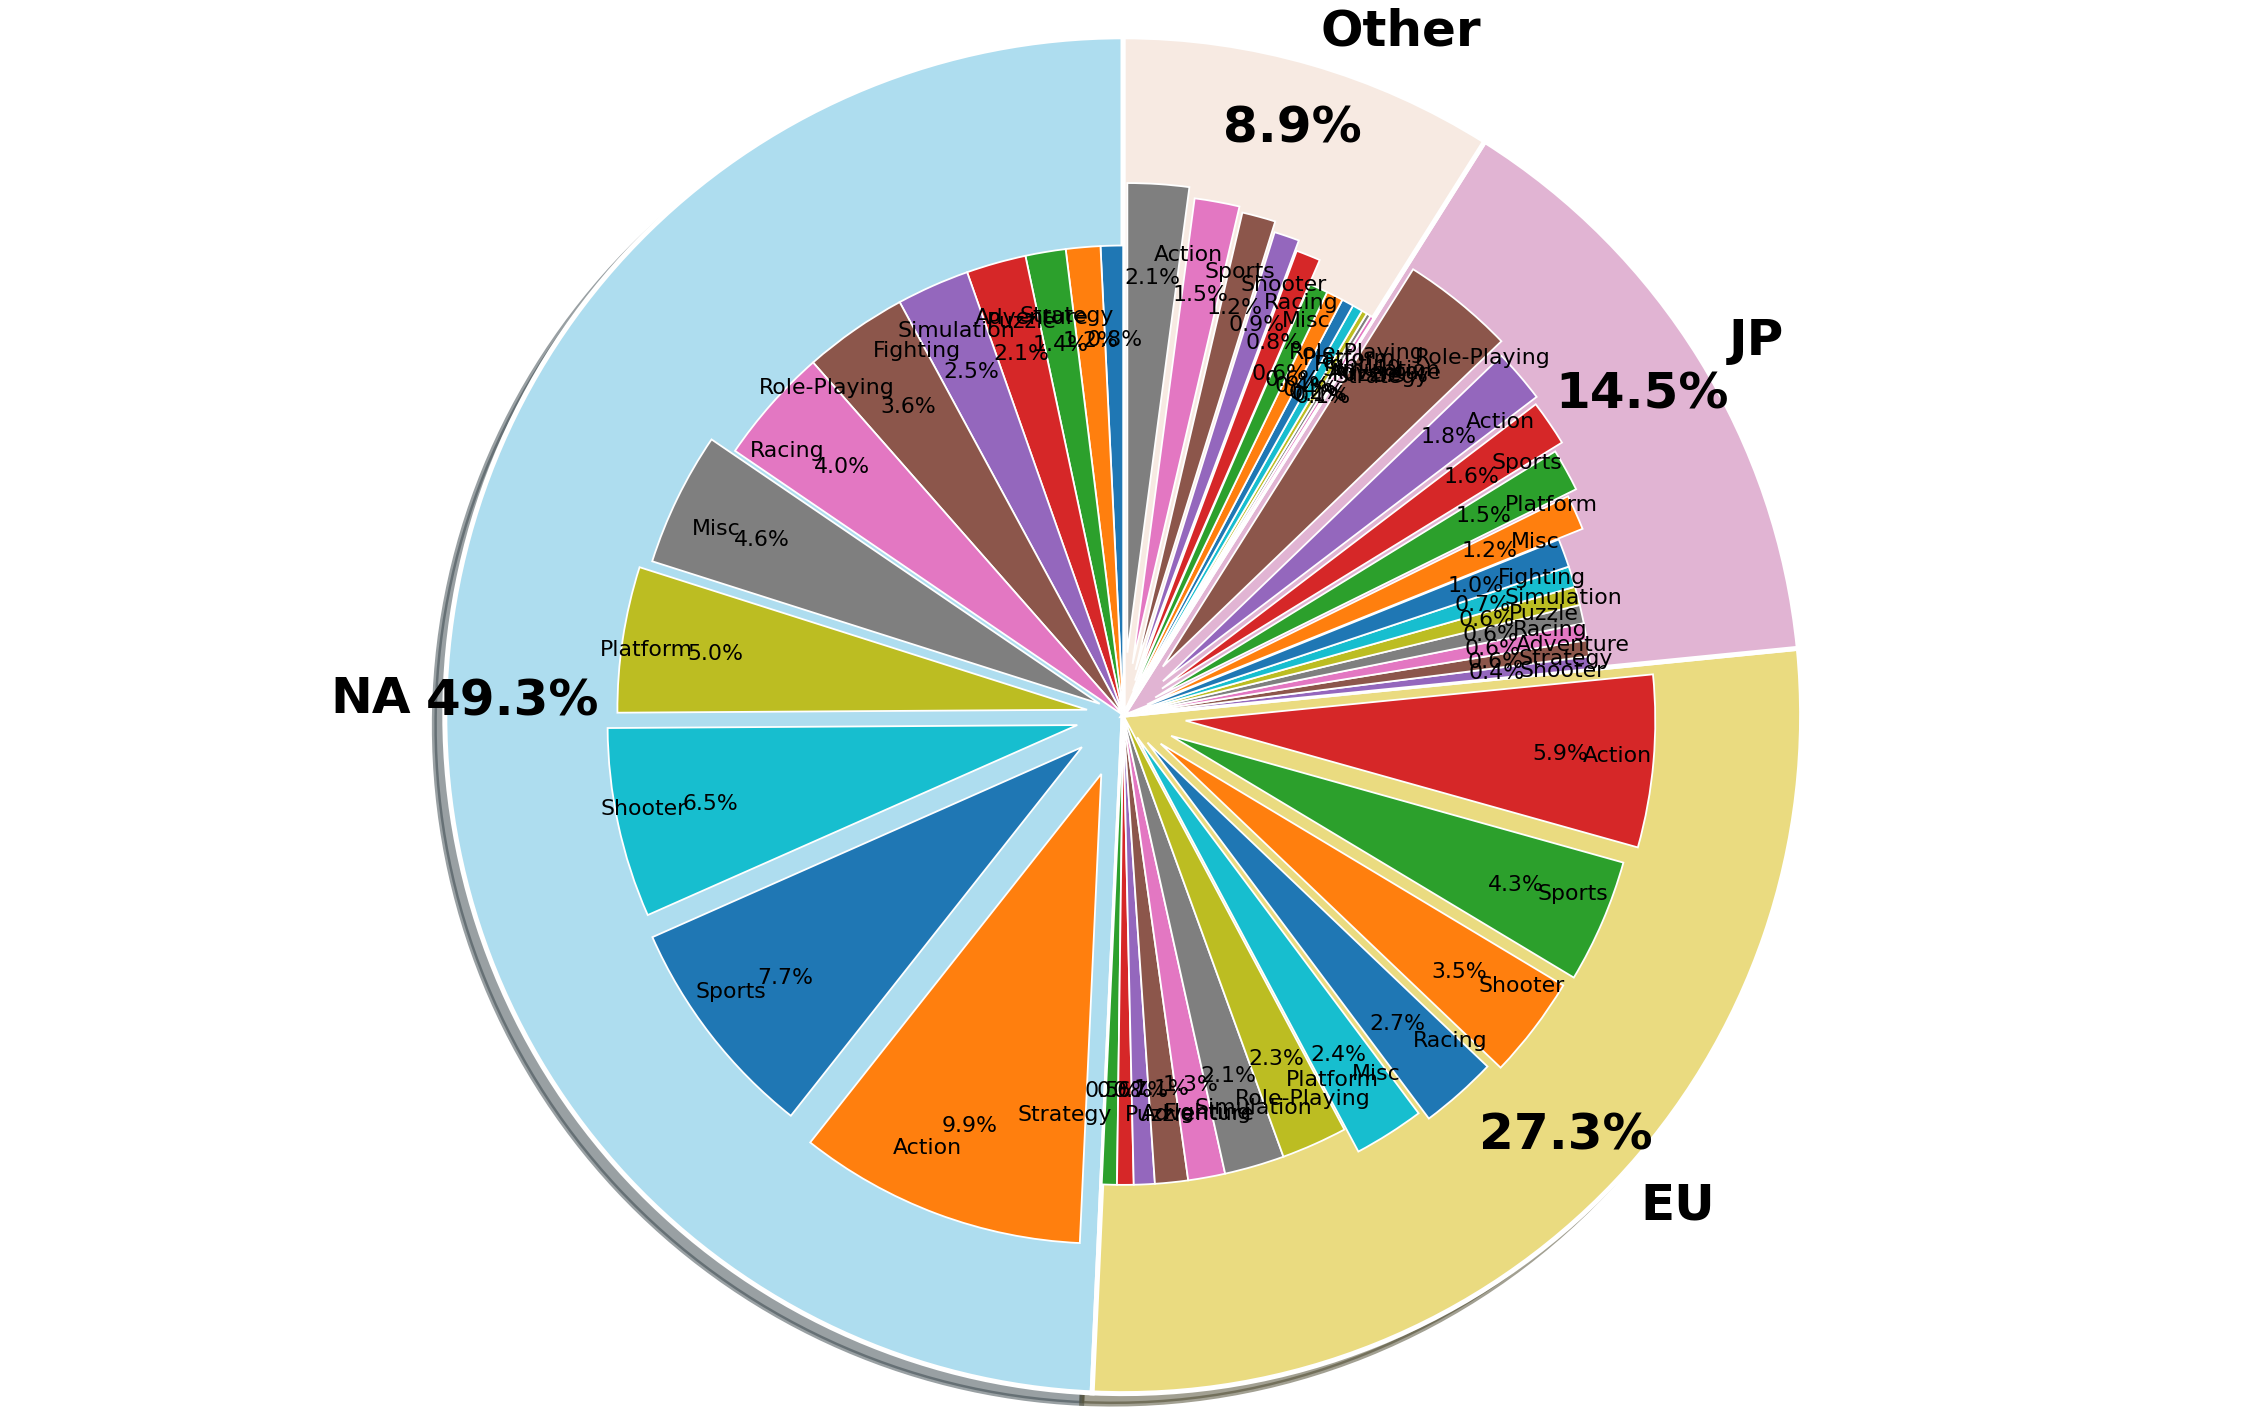

In [14]:
width_num = 0.4
explode = [0.1, 0.1, 0.05, 0.05]
explode2 = [0,0,0,0,0,0,0,0.05,0.07,0.09,0.1,0.12,
            0,0,0,0,0,0,0,0.05,0.07,0.09,0.1,0.12,
            0,0,0,0,0,0,0,0.05,0.07,0.09,0.1,0.12,
            0,0,0,0,0,0,0,0.05,0.07,0.09,0.1,0.12]

plt.rcParams['figure.figsize'] = [40, 24]

fig,ax = plt.subplots()
ax.axis('equal')
pie_outside= ax.pie(sales_sum,
                    radius=1.3,
                    labels=sales_name,
                    labeldistance = 1.05,
                    autopct='%.1f%%',
                    pctdistance=0.9,
                    colors = ['#AEDDEF', '#EADB80', '#E1B4D3', '#F7EAE2'],
                    #counterclock=False,
                    shadow=True,
                    startangle=90,
                    textprops={'fontsize': 50,'fontweight':'bold'},
                    wedgeprops={"edgecolor":"white",'linewidth': 5, 'antialiased': True})

pie_inside= ax.pie(sumsum,
         radius=(1.3 - width_num),
         labels = sumindex,
         labeldistance=0.85,
         autopct='%.1f%%',
         pctdistance=0.8,  
         #counterclock=False,
         explode=explode2,
         startangle=90,
         wedgeprops={"edgecolor":"white",'linewidth': 1.8, 'antialiased': True},
         textprops={'fontsize': 22})

plt.show()


In [ ]:
df_a.sort_values(by=['All_Sales','JP_Sales'],ascending=False).head(20)

In [ ]:
df_a.pivot_table(['Genre'],['Year'],aggfunc=['sum'])
df1 = pd.pivot_table(df_a, index = 'Year', columns= 'Genre',values ='All_Sales', aggfunc= np.sum,fill_value=0)
df2 = df1.cumsum()
df1 = df1.iloc[:-2]
df1

In [15]:
import matplotlib.animation as ani
df2.rename_axis(None, inplace=True)
df2.columns.name = None
df1.rename_axis(None, inplace=True)
df1.columns.name = None

In [ ]:
import pandas_alive
df2.plot_animated(filename='/content/gdrive/My Drive/line2.gif',period_fmt="%Y")
df1.plot_animated(filename='/content/gdrive/My Drive/line1.gif',period_fmt="%Y")

In [ ]:
df1.plot_animated(filename='/content/gdrive/My Drive/line2.gif')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as ani

color = ['red', 'green', 'blue', 'orange','red', 'green', 'blue', 'orange','red', 'green', 'blue', 'orange']
fig = plt.figure()
plt.xticks(rotation=45, ha="right", rotation_mode="anchor") #rotate the x-axis values
plt.subplots_adjust(bottom = 0, top = 2) #ensuring the dates (on the x-axis) fit in the screen
plt.ylabel('No of Deaths')
plt.xlabel('Dates')
def buildmebarchart(i=int):
    plt.legend(df1.columns)
    p = plt.plot(df1[:i].index, df1[:i].values) #note it only returns the dataset, up to the point i
    for i in range(0,12):
        p[i].set_color(color[i]) #set the colour of each curve
animator = ani.FuncAnimation(fig, buildmebarchart, interval = 100)
plt.show()

In [ ]:
df_a['NA_Sales'] = df_a['NA_Sales']*1000
df_a['EU_Sales'] = df_a['EU_Sales']*1000
df_a['JP_Sales'] = df_a['JP_Sales']*1000
df_a['Other_Sales'] = df_a['Other_Sales']*1000
df_a['NA_Sales'].apply(toInt)
df_a['EU_Sales'].apply(toInt)
df_a['JP_Sales'].apply(toInt)
df_a['Other_Sales'].apply(toInt)
df_a['All_Sales'].apply(toInt)

In [18]:
import urllib
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [19]:
df_RPG = df_a[df_a['Genre'] == 'Role-Playing']
df_RPG_N = df_RPG['NA_Sales']
df_RPG_E = df_RPG['EU_Sales']
df_RPG_J = df_RPG['JP_Sales']
df_RPG_O = df_RPG['Other_Sales']

df_Act = df_a[df_a['Genre'] == 'Action']
df_Act_N = df_Act['NA_Sales']
df_Act_E = df_Act['EU_Sales']
df_Act_J = df_Act['JP_Sales']
df_Act_O = df_Act['Other_Sales']

df_Gun = df_a[df_a['Genre'] == 'Shooter']
df_Gun_N = df_Gun['NA_Sales']
df_Gun_E = df_Gun['EU_Sales']
df_Gun_J = df_Gun['JP_Sales']
df_Gun_O = df_Gun['Other_Sales']

df_Spt = df_a[df_a['Genre'] == 'Sports']
df_Spt_N = df_Spt['NA_Sales']
df_Spt_E = df_Spt['EU_Sales']
df_Spt_J = df_Spt['JP_Sales']
df_Spt_O = df_Spt['Other_Sales']

df_Plf = df_a[df_a['Genre'] == 'Platform']
df_Plf_N = df_Plf['NA_Sales']
df_Plf_E = df_Plf['EU_Sales']
df_Plf_J = df_Plf['JP_Sales']
df_Plf_O = df_Plf['Other_Sales']

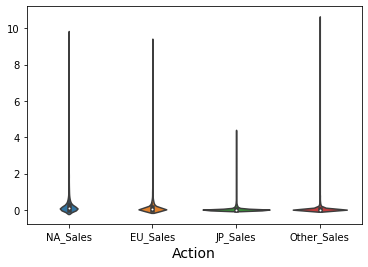

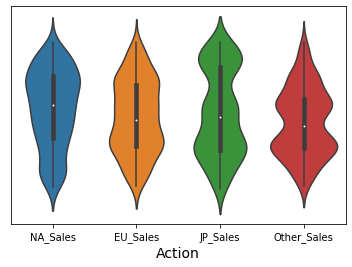

In [20]:
odata_acn = outliers_iqr(df_Act_N)
odata_ace = outliers_iqr(df_Act_E)
odata_acj = outliers_iqr(df_Act_J)
odata_aco = outliers_iqr(df_Act_O)

data1234 = [df_Act_N, df_Act_E, df_Act_J, df_Act_O]
odata1234 = [odata_acn,odata_ace,odata_acj,odata_aco]
sns.violinplot(data=data1234) 
plt.xlabel("Action", fontsize=14) 
plt.xticks([0,1,2,3],['NA_Sales','EU_Sales','JP_Sales','Other_Sales'])
plt.show()

sns.violinplot(data=odata1234) 
plt.xlabel("Action", fontsize=14) 
plt.xticks([0,1,2,3],['NA_Sales','EU_Sales','JP_Sales','Other_Sales'])
plt.yticks([])
plt.show()

In [52]:
from scipy import stats 
stats.f_oneway(df_Act_N,df_Act_E, df_Act_J,df_Act_O)

F_onewayResult(statistic=235.1811090354175, pvalue=1.0878313375490902e-148)

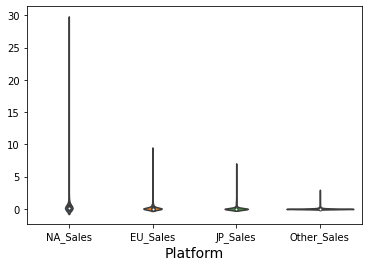

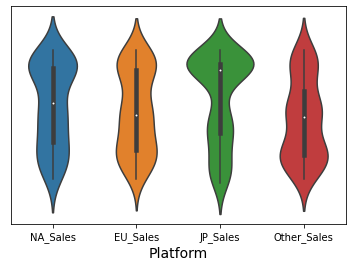

In [26]:
odata_pn = outliers_iqr(df_Plf_N)
odata_pe = outliers_iqr(df_Plf_E)
odata_pj = outliers_iqr(df_Plf_J)
odata_po = outliers_iqr(df_Plf_O)

data1234 = [df_Plf_N, df_Plf_E, df_Plf_J, df_Plf_O]
odata1234 = [odata_pn,odata_pe,odata_pj,odata_po]
sns.violinplot(data=data1234) 
plt.xlabel("Platform", fontsize=14) 
plt.xticks([0,1,2,3],['NA_Sales','EU_Sales','JP_Sales','Other_Sales'])
plt.show()

sns.violinplot(data=odata1234) 
plt.xlabel("Platform", fontsize=14) 
plt.xticks([0,1,2,3],['NA_Sales','EU_Sales','JP_Sales','Other_Sales'])
plt.yticks([])
plt.show()

In [54]:
stats.f_oneway(df_Plf_N,df_Plf_E, df_Plf_J,df_Plf_O)

F_onewayResult(statistic=45.244888709762336, pvalue=1.0994873009718882e-28)

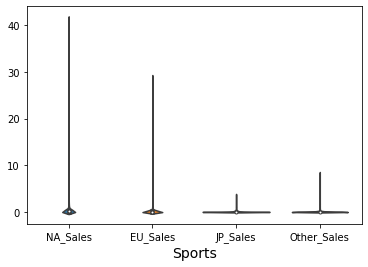

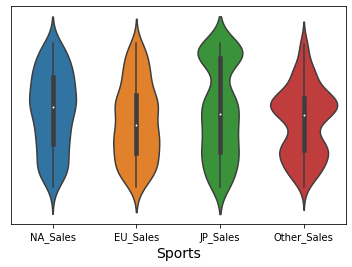

In [21]:
odata_spn = outliers_iqr(df_Spt_N)
odata_spe = outliers_iqr(df_Spt_E)
odata_spj = outliers_iqr(df_Spt_J)
odata_spo = outliers_iqr(df_Spt_O)

data1234 = [df_Spt_N, df_Spt_E, df_Spt_J, df_Spt_O]
odata1234 = [odata_spn,odata_spe,odata_spj,odata_spo]
sns.violinplot(data=data1234) 
plt.xlabel("Sports", fontsize=14) 
plt.xticks([0,1,2,3],['NA_Sales','EU_Sales','JP_Sales','Other_Sales'])
plt.show()

sns.violinplot(data=odata1234) 
plt.xlabel("Sports", fontsize=14) 
plt.xticks([0,1,2,3],['NA_Sales','EU_Sales','JP_Sales','Other_Sales'])
plt.yticks([])
plt.show()

In [58]:
stats.f_oneway(df_Spt_N,df_Spt_E, df_Spt_J,df_Spt_O)

F_onewayResult(statistic=64.42609498736635, pvalue=3.142510197997088e-41)

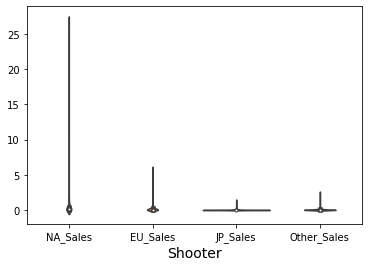

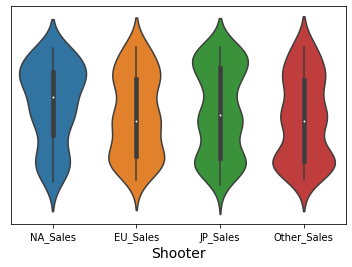

In [22]:
odata_gn = outliers_iqr(df_Gun_N)
odata_ge = outliers_iqr(df_Gun_E)
odata_gj = outliers_iqr(df_Gun_J)
odata_go = outliers_iqr(df_Gun_O)

data1234 = [df_Gun_N, df_Gun_E, df_Gun_J, df_Gun_O]
odata1234 = [odata_gn,odata_ge,odata_gj,odata_go]
sns.violinplot(data=data1234) 
plt.xlabel("Shooter", fontsize=14) 
plt.xticks([0,1,2,3],['NA_Sales','EU_Sales','JP_Sales','Other_Sales'])
plt.show()

sns.violinplot(data=odata1234) 
plt.xlabel("Shooter", fontsize=14) 
plt.xticks([0,1,2,3],['NA_Sales','EU_Sales','JP_Sales','Other_Sales'])
plt.yticks([])
plt.show()

In [60]:
stats.f_oneway(df_Spt_N,df_Spt_E, df_Spt_J,df_Spt_O)

F_onewayResult(statistic=64.42609498736635, pvalue=3.142510197997088e-41)

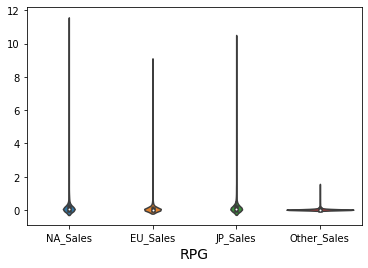

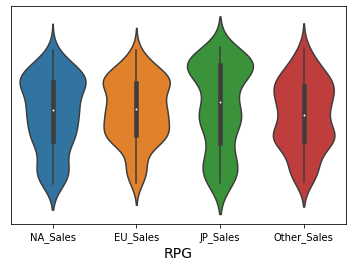

In [25]:
odata_rpgn = outliers_iqr(df_RPG_N)
odata_rpge = outliers_iqr(df_RPG_E)
odata_rpgj = outliers_iqr(df_RPG_J)
odata_rpgo = outliers_iqr(df_RPG_O)

data1234 = [df_RPG_N, df_RPG_E, df_RPG_J, df_RPG_O]
odata1234 = [odata_rpgn, odata_rpge, odata_rpgj, odata_rpgo]
sns.violinplot(data=data1234) 
plt.xlabel("RPG" ,fontsize=14) 
plt.xticks([0,1,2,3],['NA_Sales','EU_Sales','JP_Sales','Other_Sales'])
plt.show()

sns.violinplot(data=odata1234) 
plt.xlabel("RPG", fontsize=14) 
plt.xticks([0,1,2,3],['NA_Sales','EU_Sales','JP_Sales','Other_Sales'])
plt.yticks([])
plt.show()

In [67]:
stats.f_oneway(df_RPG_N,df_RPG_E, df_RPG_J,df_RPG_O)

F_onewayResult(statistic=44.17378933275885, pvalue=3.1758931893938497e-28)

In [37]:
from scipy import stats 
stats.f_oneway(df_Act_N,df_Act_E, df_Act_J,df_Act_O)

F_onewayResult(statistic=235.1811090354175, pvalue=1.0878313375490902e-148)

In [38]:
stats.f_oneway(df_Plf_N,df_Plf_E, df_Plf_J,df_Plf_O)

F_onewayResult(statistic=45.244888709762336, pvalue=1.0994873009718882e-28)

In [39]:
stats.f_oneway(df_Gun_N,df_Gun_E, df_Gun_J,df_Gun_O)

F_onewayResult(statistic=102.29811749668441, pvalue=2.3763886155449728e-64)

In [40]:
stats.f_oneway(df_Spt_N,df_Spt_E, df_Spt_J,df_Spt_O)

F_onewayResult(statistic=64.42609498736635, pvalue=3.142510197997088e-41)

In [42]:
stats.f_oneway(df_RPG_N,df_RPG_E, df_RPG_J,df_RPG_O)

F_onewayResult(statistic=44.17378933275885, pvalue=3.1758931893938497e-28)

In [22]:
nintendo_cumsum = df_a[df_a['Publisher'] =='Nintendo']


In [ ]:
df_a['Publisher']

In [ ]:
ninten = nintendo_cumsum['All_Sales'].sum(),df_a['All_Sales'].sum()-nintendo_cumsum['All_Sales'].sum()
plt.pie(ninten,labels=['Nintendo',''],autopct='%.2f%%',colors=['Orange','Mediumblue'],
        shadow=True,
        startangle=90,
        textprops={'fontsize': 40,'fontweight':'bold'},
        wedgeprops={"edgecolor":"white",'linewidth': 1.8, 'antialiased': True})
plt.rcParams['figure.figsize'] = [40, 24]
plt.show

In [ ]:
df_All_plat = df_a['All_Sales'].groupby(df_a['Platform']).sum()
df_All_f = df_All_plat.sort_values()

platsum = list(df_All_f.values)
platindex = list(df_All_f.index)

fig,ax = plt.subplots()
ax.axis('equal')
plt.pie(platsum,labels=platindex,autopct='%.2f%%',shadow=True,
                    startangle=90,
                    textprops={'fontsize': 25,'fontweight':'bold'},
                    wedgeprops={"edgecolor":"white",'linewidth': 1.8, 'antialiased': True})
plt.rcParams['figure.figsize'] = [40, 24]
plt.show()

In [36]:

aa1 = pd.pivot_table(df_a, index = 'Year',values ='All_Sales', aggfunc= np.sum,fill_value=0)
aa1 = aa1.iloc[:-1,:]
aa1.rename_axis(None, inplace=True)
aa1.columns.name = None

aa2 = pd.pivot_table(nintendo_cumsum, index = 'Year',values ='All_Sales', aggfunc= np.sum,fill_value=0)
aa2 = aa2.iloc[:-1,:]
aa2.rename_axis(None, inplace=True)
aa2.columns.name = None

In [ ]:
df_a[df_a['Year'] == 2008].sort_values(by='All_Sales')

In [ ]:
df_a['Year']
list(aa2.index)

In [ ]:
plt.plot(aa1,marker='s',linewidth=5,markersize=9)
plt.plot(aa2,marker='o',linewidth=5,markersize=9)
plt.xticks(list(aa2.index))
plt.tick_params(axis='x', direction='in', length=5, pad=6, labelsize=15, labelcolor='Black', top=True)
plt.tick_params(axis='y', direction='inout', length=10, pad=15, labelsize=30, width=2, color='r')
plt.show()

In [ ]:
df_2014 = df_a[df_a['Year'] == 2015]
df_2014['All_Sales'].cumsum()

In [ ]:
df_a[df_a['Year'] ==2006].sort_values(by='All_Sales')

In [65]:
df_sports.count()

Name           2359
Platform       2359
Year           2359
Genre          2359
Publisher      2356
NA_Sales       2359
EU_Sales       2359
JP_Sales       2359
Other_Sales    2359
All_Sales      2359
dtype: int64

In [50]:
df_sports = df_a[df_a['Genre']=='Sports']
df_sports['All_Sales'].sum()

1346.79

In [63]:
df_rank = df_sports.sort_values(by='All_Sales')
df_rank = df_rank.iloc[-4:,:]
df_rank['All_Sales'].sum()

160.46